In [ ]:
print(" Welcome to the chemical descriptor analysis script. Be careful not to break everything")

In [ ]:
val = (input("name: "))
print(f" {val} hello my name is {val}")

In [ ]:
alder = (input("Alder: "))
print(f"{val}'s age is {alder}")

In [ ]:

import rdkit as rdkit
print("rdkit imported successfully")

In [ ]:
from rdkit import *
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import MolFromSmiles
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit import rdBase
import numpy as np



In [46]:
molGlucIso = Chem.MolFromSmiles("OC[C@H]1OC(O)[C@H](O)[C@@H](O)[C@@H]1O") #Glucose  Isomeric Smiles
molGlucCan = Chem.MolFromSmiles("C(C1C(C(C(C(O1)O)O)O)O)O") # Glucose canonical smiles


molInchi = Chem.MolFromInchi("InChI=1S/C6H12O6/c7-1-2-3(8)4(9)5(10)6(11)12-2/h2-11H,1H2/t2-,3-,4+,5-,6?/m1/s1") # Glucose Lets do Inchi



DRAWING MOLECULES

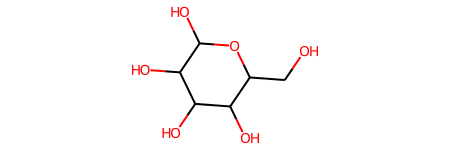

In [61]:
molGlucCan

In [55]:
smiles = Chem.MolToSmiles(molInchi)

In [56]:
smiles

'OC[C@H]1OC(O)[C@H](O)[C@@H](O)[C@@H]1O'

EXTRACTING CHEMICAL DESCRIPTORS


In [50]:
mw = Descriptors.MolWt(molInchi)

mw2 = Descriptors.MolLogP(molInchi)

In [59]:
print(f"The molecular weight is:" ({mw}) )

print(mw2)


<>:1: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
<>:1: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
C:\Users\meide\AppData\Local\Temp/ipykernel_6684/902978222.py:1: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
  print(f"The molecular weight is:" ({mw}) )


TypeError: 'str' object is not callable

In [42]:
smiles_list = ['OC[C@H]1OC(O)[C@H](O)[C@@H](O)[C@@H]1O', "CC(=O)[O-]","O=P(O)(O)OP(=O)(O)OP(=O)(O)OC[C@H]3O[C@@H](n2cnc1c(ncnc12)N)[C@H](O)[C@@H]3O", "S"]


In [43]:
smiles_list


['OC[C@H]1OC(O)[C@H](O)[C@@H](O)[C@@H]1O',
 'CC(=O)[O-]',
 'O=P(O)(O)OP(=O)(O)OP(=O)(O)OC[C@H]3O[C@@H](n2cnc1c(ncnc12)N)[C@H](O)[C@@H]3O',
 'S']

In [ ]:
mol_list = []
for smiles in smiles_list:
    mol = Chem.MolFromSmiles(smiles)
    mol_list.append(mol)



In [ ]:
img = Draw.MolsToGridImage(mol_list, molsPerRow = 2, useSVG = True)

#Calls img
img

List of Metabolites in the central TCA cycle

In [ ]:
TCA_smile_list = [
"OC(=O)CC(O)(C(=O)O)CC(=O)O",
"C(C(=CC(=O)O)C(=O)O)C(=O)O","C(C(C(C(=O)O)O)C(=O)O)C(=O)O", 
"O=C(O)C(=O)CCC(=O)O",
"O=C(O)CCC(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)(C)COP(=O)(O)OP(=O)(O)OC[C@H]3O[C@@H](n2cnc1c(ncnc12)N)[C@H](O)[C@@H]3OP(=O)(O)O",
"C(CC(=O)O)C(=O)O", 
"C(=C/C(=O)O)\C(=O)O", 
"O=C(O)CC(O)C(=O)O", 
"O=C(O)C(=O)CC(=O)O"]

In [ ]:
TCA_draw = []
for smiles in TCA_smile_list:
    mol = Chem.MolFromSmiles(smiles)
    TCA_draw.append(mol)


In [ ]:
imgTCA = Draw.MolsToGridImage(TCA_draw, molsPerRow = 3, useSVG = True)

In [ ]:
imgTCA

In [ ]:
#pattern = Chem.MolFromSmiles("S")
#pattern = Chem.MolFromSmiles("C(=O)O")
#pattern = Chem.MolFromSmiles("CC(N)C")

pattern = Chem.MolFromSmarts("[r5]")

for mol in TCA_draw:
    print(mol.HasSubstructMatch(pattern))

FINGERPRINTING


In [ ]:
glucose = mol_list[0]

In [ ]:
glucose

In [ ]:
bi = {}
fp = AllChem.GetMorganFingerprintAsBitVect(glucose,2, nBits = 1024, bitInfo = bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
fp_arr


In [ ]:
np.nonzero(fp_arr)

In [ ]:
bi

In [ ]:
prints = [(glucose, x, bi) for x in fp.GetOnBits()]

In [ ]:
prints

In [ ]:
print(rdBase.rdkitVersion)
import time
print(time.asctime())

In [ ]:
Chem.innchi